# Exercise Sheet 1



### Read the Dataset

- Use Pandas to read the 'covertype.csv' file
- The dataset contains information on different forest cover types
- Look at the columns. Which of them contain meaningful features?



### Seperate Features and Labels
- Define x as the vectors of meaningful features
- Define y as the labels (Cover_Type)



### Split the dataset into two disjoint datasets for training and testing
- Randomly split the dataset. Use 70% for training and 30% for testing.
- Define x_train and x_test as the feature vectors
- Define y_train and y_test as the labels
    - Hint: Have a look at the sklearn package

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

data=pd.read_csv('covertype.csv')

cols=['Id','Soil_Type7','Soil_Type15']
data.drop(cols,axis=1,inplace=True)

p=[str(i) for i in range(0,data.shape[1])]
data.columns=p

x=data[[str(i) for i in range(0,data.shape[1]-1)]]
y=data[str(data.shape[1]-1)]
y=y-1

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
x_x_train=x_train
x_x_test=x_test

### Train a simple deep neural network
- Use Pytorch to define a simple Multi-Layer Perceptron with at least 3 layers
    - The input layer should have as many neurons as there are features
        - How many features are there?
    - The last layer should have as many neurons as there are classes
        - How many classes are there?
- Pack your training and testing datasets in a class which inherits from torch.utils.data.Datset
    - features you input to your network should be of type torch.float
    - labels should be of type torch.long.
- Use a torch.utils.data.DataLoader to access your data in batches
- Train the MLP with your data from the train_loader using Cross-Entropy Loss and the Adam Optimizer
    - Make sure to save the training history for later assessment
- Evaluate the performance on your test_loader

In [0]:
import torch

# Define your MLP
import torch
# Define your MLP
import torch.nn as nn
import torch.nn.functional as F

x_train = torch.tensor(x_train.values).to(dtype=torch.float)
y_train = torch.tensor(y_train.values).to(dtype=torch.long)
x_test = torch.tensor(x_test.values).to(dtype=torch.float)
y_test = torch.tensor(y_test.values).to(dtype=torch.long)

input_size = x.shape[1]
hidden_size = 100
num_classes = 7
batch_size = 250
learning_rate = 0.005

class Perceptron(nn.Module):

    def __init__(self,input_size, hidden_size, num_classes):
        
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, hidden_size)
        self.fc6 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        out = F.relu(self.fc4(out))
        out = F.relu(self.fc5(out))
        out = F.log_softmax(self.fc6(out), dim=1)
        return out

In [0]:
# Create your DataLoaders


x_train = torch.utils.data.DataLoader(dataset=x_train,batch_size=batch_size)
y_train = torch.utils.data.DataLoader(dataset=y_train,batch_size=batch_size)


x_test = torch.utils.data.DataLoader(dataset=x_test,batch_size=batch_size)
y_test = torch.utils.data.DataLoader(dataset=y_test,batch_size=batch_size)



In [0]:
# Instantiate the network, the optimizer and the Loss Criterion

import torch.optim as optim

model = Perceptron(input_size, hidden_size, num_classes)

optimizer=optim.Adam(model.parameters(), lr= learning_rate)

criterion=nn.CrossEntropyLoss()

In [0]:
# Define your training Loop
def train_epoch(model, x_train ,y_train , criterion, optimizer):
    model.train()
    epoch_loss = 0
    correct = 0.
    samples = 0.
    for x,y in zip(x_train,y_train):
        optimizer.zero_grad()
        data, label = x,y
        prediction = model(data)
        loss = criterion(prediction, label)
        correct += sum(torch.argmax(prediction, dim=1) == label)
        samples += len(data)
        epoch_loss += loss.data
        loss.backward()
        optimizer.step()
    return epoch_loss, correct/samples


# Define your testing Loop
def test_epoch(model, x_test, y_test, criterion):
    model.eval()
    epoch_loss = 0
    correct = 0.
    samples = 0.
    for x,y in zip(x_test,y_test):
        data, label = x,y
        prediction = model(data)
        loss = criterion(prediction, label)
        correct += sum(torch.argmax(prediction, dim=1) == label)
        samples += len(data)
        epoch_loss += loss.data
    return epoch_loss, correct/samples
    


In [623]:
# Check if your training and testing loops are working
train_epoch(model, x_train, y_train, criterion, optimizer)
test_epoch(model, x_test, y_test, criterion)


(tensor(30.2492), tensor(0.3230))

### Debug
- If there is a RuntimeError raised in you loss function, either your network architecture or your data is faulty
    - Check your network architecture
    - Check your data
        - Are there any NaN or infinite features or labels?
    - Print the labels.
        - How many unique labels do you have?
        - Are they [0, ..., n-1]?
            - If not, align them

In [0]:
# Inspect your data
import numpy as np





In [0]:
# Fix your data and recreate your DataLoaders





### Train your Network
- Reinitialize your MLP from above and train it for 100 epochs

In [625]:
import tqdm

# net = 
# optimizer = 

train_loss, train_accuracy = [], []
test_loss, test_accuracy = [], []

for i in tqdm.tnrange(100):
    loss, accuracy = train_epoch(model, x_train,y_train, criterion, optimizer)
    train_loss.append(loss)
    train_accuracy.append(accuracy)
    loss, accuracy = test_epoch(model, x_test, y_test, criterion)
    test_loss.append(loss)
    test_accuracy.append(accuracy)

    

### Does it work?
- There should not be a RuntimeError raised now
- Does the network converge / Does the loss decrease?


### Visualize the training
- use matplotlib.pyplot to visualize the history
- plot both the training accuracy and the validation accuracy
- Does the training stagnate?

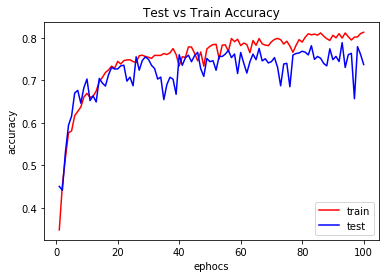

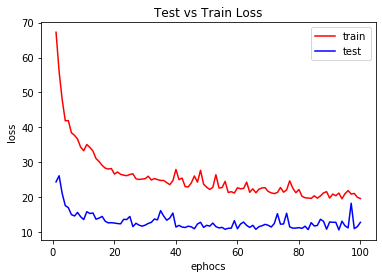

In [626]:
import matplotlib.pyplot as plt
ephocs=[i for i in range(1,101)]
plt.plot(ephocs,train_accuracy,color='red')
plt.plot(ephocs,test_accuracy,color='blue')
plt.title('Test vs Train Accuracy')
plt.legend(['train','test'],loc='lower right')
plt.xlabel('ephocs')
plt.ylabel('accuracy')
plt.show()
plt.plot(ephocs,train_loss,color='red')
plt.plot(ephocs,test_loss,color='blue')
plt.title('Test vs Train Loss')
plt.legend(['train','test'],loc='upper right')
plt.xlabel('ephocs')
plt.ylabel('loss')
plt.show()




### Inspect the data
- Compute the min, max, mean and standard deviation of each feature
- What data type do the columns have?
- Use Pandas to print the statistics in a table
- What could be problematic with the dataset?

In [627]:
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
a,b,c,d,e=[],[],[],[],[]
stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])
# Compute the values for each column
for i in range(0,input_size):
  a.append(np.dtype(x[f'{i}']))
  b.append(np.mean(x[f'{i}']))
  c.append(np.amin(x[f'{i}']))
  d.append(np.amax(x[f'{i}']))
  e.append(np.std(x[f'{i}']))
stats['Type'],stats['Min'],stats['Max'],stats['Mean'],stats['Std']=a,c,d,b,e
display(stats)

,Type,Min,Max,Mean,Std
0,int64,1863,3849,2749.32,417.66
1,int64,0,360,156.68,110.08
2,int64,0,52,16.50,8.45
3,int64,0,1343,227.20,210.07
4,int64,-146,554,51.08,61.24
5,int64,0,6890,1714.02,1325.02
6,int64,0,254,212.70,30.56
7,int64,99,254,218.97,22.80
8,int64,0,248,135.09,45.89
9,int64,0,6993,1511.15,1099.90


### Preprocess the Data
- Normalize or standardize your data, so all features are at the same scale.
    - This will help your network to use all available features and not be biased by some features with large values
    - Does it make sense to normalize all columns, or only some?
- Hint: Again, look if you find something useful in sklearn


- Never use test data to optimize your training! This includes the preprocessing
    - Find preprocessing parameters on your training data only!
    - Transform all your data with the computed parameters
    - You have to remember which of your samples are used for training and which are for testing


In [0]:
from sklearn import preprocessing as pr
x_train=pr.normalize(x_x_train,'l2')
x=pd.DataFrame(data=x_train,columns=[str(i) for i in range(input_size)])
x_test=pr.normalize(x_x_test,'l2')



### Inspect data again
- Print the statistics of the preprocessed data using the code from above

In [629]:
pd.options.display.float_format = '{:.2f}'.format
a,b,c,d,e=[],[],[],[],[]
stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])
# Compute the values for each column
for i in range(1,input_size):
  a.append(np.dtype(x[f'{i}']))
  b.append(np.mean(x[f'{i}']))
  c.append(np.amin(x[f'{i}']))
  d.append(np.amax(x[f'{i}']))
  e.append(np.std(x[f'{i}']))
stats['Type'],stats['Min'],stats['Max'],stats['Mean'],stats['Std']=a,c,d,b,e
display(stats)

,Type,Min,Max,Mean,Std
0,float64,0.00,0.17,0.05,0.04
1,float64,0.00,0.02,0.01,0.00
2,float64,0.00,0.28,0.06,0.05
3,float64,-0.05,0.14,0.01,0.02
4,float64,0.00,0.89,0.40,0.20
5,float64,0.00,0.13,0.06,0.02
6,float64,0.02,0.12,0.06,0.02
7,float64,0.00,0.12,0.04,0.02
8,float64,0.01,0.92,0.37,0.17
9,float64,0.00,0.00,0.00,0.00


### Train the network again
- Recreate your DataLoaders with the normalized data
- Reinitialize or your MLP from above and train it again


In [0]:
# Recreate your DataLoaders with the normalized data

x_train=torch.tensor(x_train).to(dtype=torch.float)
x_train = torch.utils.data.DataLoader(dataset=x_train,batch_size=batch_size)
x_test=torch.tensor(x_test).to(dtype=torch.float)
x_test = torch.utils.data.DataLoader(dataset=x_test,batch_size=batch_size)

In [631]:
# net = 
# optimizer = 

train_loss, train_accuracy = [], []
test_loss, test_accuracy = [], []

for i in tqdm.tnrange(100):
    loss, accuracy = train_epoch(model, x_train, y_train, criterion, optimizer)
    train_loss.append(loss)
    train_accuracy.append(accuracy)
    loss, accuracy = test_epoch(model, x_test, y_test, criterion)
    test_loss.append(loss)
    test_accuracy.append(accuracy)


### Visualize the training
- use matplotlib.pyplot to visualize the history
- plot both the training accuracy and the validation accuracy

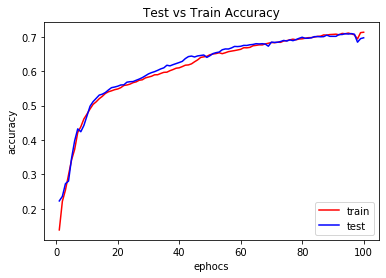

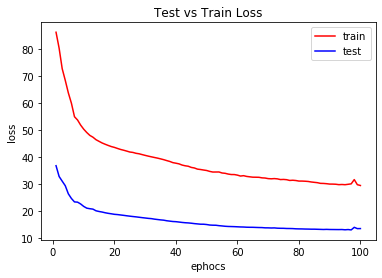

In [632]:
import matplotlib.pyplot as plt
ephocs=[i for i in range(1,101)]
plt.plot(ephocs,train_accuracy,color='red')
plt.plot(ephocs,test_accuracy,color='blue')
plt.title('Test vs Train Accuracy')
plt.legend(['train','test'],loc='lower right')
plt.xlabel('ephocs')
plt.ylabel('accuracy')
plt.show()
plt.plot(ephocs,train_loss,color='red')
plt.plot(ephocs,test_loss,color='blue')
plt.title('Test vs Train Loss')
plt.legend(['train','test'],loc='upper right')
plt.xlabel('ephocs')
plt.ylabel('loss')
plt.show()